In [1]:
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation

tssb = load_time_series_segmentation_datasets()

In [3]:
for _, (ts_name) in tssb.iterrows():
    print(f"Time Series: {ts_name}")

Time Series: dataset                                                      Adiac
window_size                                                     10
change_points                                    [572, 1012, 1232]
time_series      [1.681146, 1.383394, 1.029389, 0.688386, 0.354...
Name: 0, dtype: object
Time Series: dataset                                                  ArrowHead
window_size                                                     10
change_points                                                [753]
time_series      [-1.957721, -1.858082, -1.657983, -1.420794, -...
Name: 1, dtype: object
Time Series: dataset                                                       Beef
window_size                                                     50
change_points                                                [705]
time_series      [-0.380818, -0.352238, -0.295392, -0.225041, -...
Name: 2, dtype: object
Time Series: dataset                                                  BeetleFly
window_s

In [4]:
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = BinaryClaSPSegmentation().fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")

C:\Users\danny\AppData\Roaming\Python\Python39\site-packages\claspy\nearest_neighbour.py:240: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  start, end = pranges[idx]


Time Series: Adiac: True Change Points: [ 572 1012 1232], Found Change Points: [334, 564, 1007, 1224], Score: 0.8074352683472928
Time Series: ArrowHead: True Change Points: [753], Found Change Points: [742], Score: 0.985496930254549
Time Series: Beef: True Change Points: [705], Found Change Points: [686], Score: 0.9734032757337095
Time Series: BeetleFly: True Change Points: [1280], Found Change Points: [1248], Score: 0.9753048780487805
Time Series: BirdChicken: True Change Points: [1280], Found Change Points: [1288], Score: 0.9937694099378881
Time Series: Car: True Change Points: [ 577 1154 1550], Found Change Points: [554, 1132], Score: 0.7416996255245951
Time Series: CBF: True Change Points: [384 704], Found Change Points: [388, 698], Score: 0.9793527517641195
Time Series: Chinatown: True Change Points: [], Found Change Points: [], Score: 1.0
Time Series: ChlorineConcentration: True Change Points: [2365], Found Change Points: [], Score: 0.5774870418254516
Time Series: CinCECGTorso: T

AttributeError: 'XTick' object has no attribute 'label'

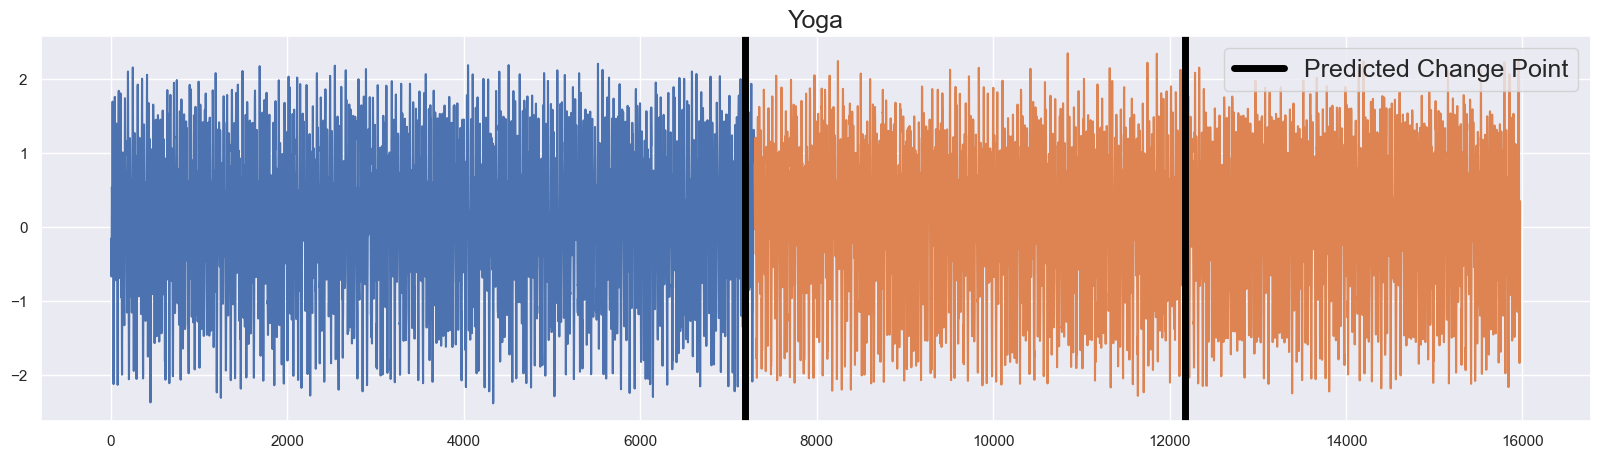

In [5]:
import matplotlib.pyplot as plt
from tssb.utils import visualize_time_series
fig, ax = visualize_time_series(ts, ts_name, cps, found_cps)
plt.show()